# Dominio del problema: Empresa de E-commerce

Olist conecta pequeñas empresas de todo Brasil con canales simples y con un único contrato. Estos comercios pueden vender sus productos a través de la tienda Olist y enviarlos directamente a los clientes utilizando sus socios logísticos. 
Después de que un cliente compra el producto en la Olist Store, se notifica al vendedor para que complete ese pedido. Una vez que el cliente recibe el producto, o vence la fecha estimada de entrega, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota de la experiencia de compra y anotar algunos comentarios.
El conjunto de datos tiene información de 100.000 pedidos realizados entre los años 2016 y 2018, en múltiples mercados de Brasil, y permite verlos desde múltiples dimensiones: desde el estado del pedido, el precio, el pago y el rendimiento del flete hasta la ubicación del cliente, los atributos del producto y finalmente las reseñas escritas por los clientes.

Se trata de datos comerciales reales, que han anonimizados. Las referencias a las empresas y socios en el texto de la reseña han sido sustituidas por los nombres de las grandes casas de Juego de Tronos.

## Atención:

1. Un pedido puede tener varios artículos.
2. Cada artículo puede ser gestionado por un vendedor distinto.
3. Todo el texto que identificaba tiendas y socios fue reemplazado por los nombres de las grandes casas de Juego de Tronos.

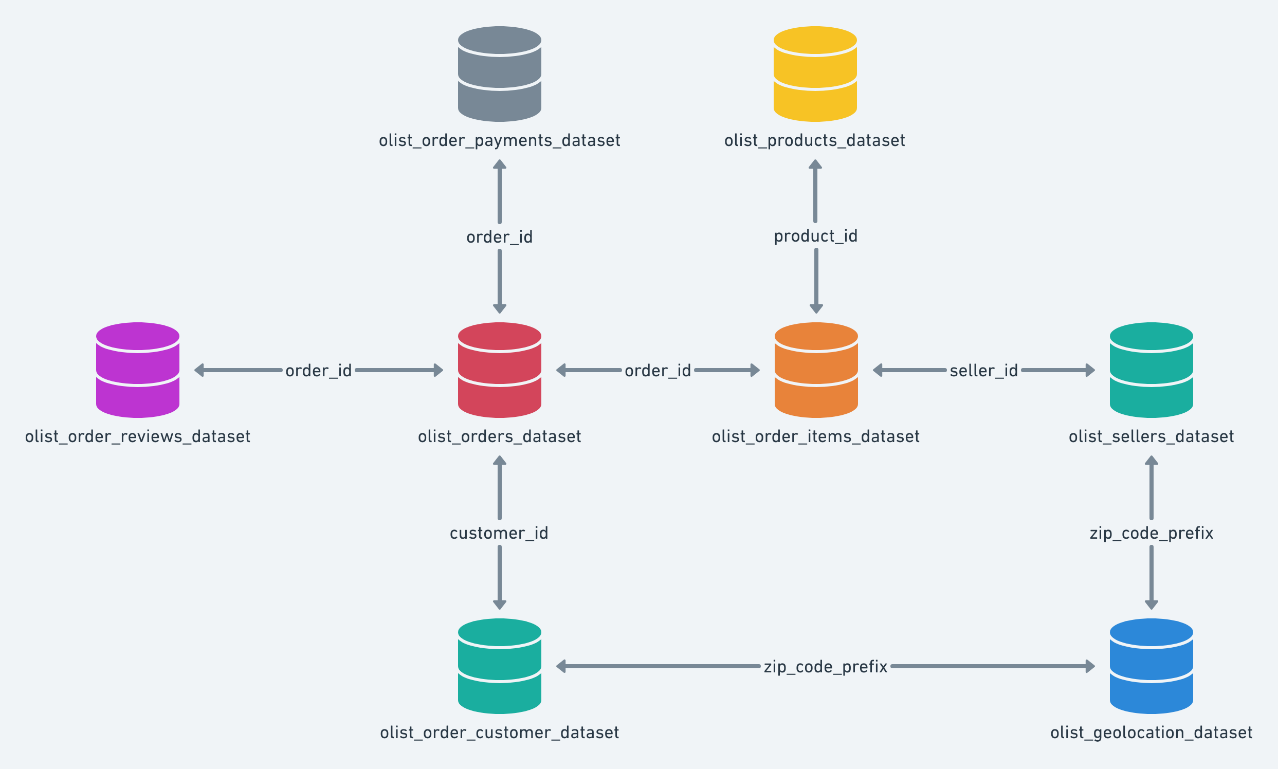

# Desafío

Eres un/a consultor/a de inteligencia de negocios y fuiste contratado/a por Olist Store para ayudarlos a comprender mejor su negocio y aumentar la satisfacción de sus clientes. Para ello, debes responder las siguientes preguntas:

    • ¿En qué estados residen nuestros clientes? ¿Cuál es el valor monetario de cada estado para Olist?
    • ¿En qué estados se encuentran nuestros vendedores? ¿Cuáles son los principales comercios?
    • ¿Cuáles son los productos (o categorías de productos) más vendidos? 
    • ¿Existe alguna relación entre la categoría de producto adquirida y la satisfacción del cliente? Si existe, ¿su impacto es mayor o menor que el tiempo de entrega?
    • Trabajando en el problema, ¿encontraste alguna otra relación interesante entre los datos?
    • Opcional: Si la empresa quisiera construir 3 centros logísticos a fin de reducir al máximo posible los tiempos de entrega, ¿en qué lugares debe hacerlo?


Para responder a estas preguntas, debes:

    1. Partiendo de la base de datos provista, generar un data mart con un esquema en estrella con los valores que consideres relevantes para responder a las preguntas planteadas arriba. Para completar este punto, te recomendamos que utilices KNIME, pero eres libre de utilizar la herramienta con la que te sientas más cómodo/a.
    2. Generar uno o más dashboards en Tableau o en PowerBI en el que se evidencien las respuestas a las preguntas planteadas. La fuente de datos utilizada en este punto debe ser el data mart generado en el punto anterior.
    3. En una videollamada que marcaremos cuando nos envíes los archivos generados, preséntanos tu solución en no más de 20 minutos.

## Atención

Los criterios con los que evaluaremos tu solución son, en orden decreciente de importancia:

    1. El proceso lógico que seguiste para resolver el problema.
    2. La claridad con la que presentes tu solución, tanto en la presentación oral como en la calidad de los dashboards.
    3. El orden, la pulcritud y la documentación de los archivos generados.
    4. El resultado obtenido.

# Inicio

Iniciamos la exploracion, seleccion y limpieza de los datos.


De acuerdo a las preguntas, buscamos saber:

1. En que estados residen los clientes. El valor monetario de cada estado (valor de las ventas por estado, interpreto)
2. En que estados estan los vendedores. Los principales comercios.
3. Productos mas vendidos, categorias de productos mas vendidos
4. Relacion (si existe) entre categoria de productos y satisfaccion del cliente. Si existe, se pregunta si 'su impacto es mayor o menor al tiempo de entrega' (aqui interpreto que propone explorar la relacion entre tiempo de entrega y satisfaccion)
5. Otras relaciones interesantes entre datos
6. Si se quiere construir 3 centros logisticos que minimicen el tiempo de entrega al maximo, en donde sugerirlos (y por que)

Comienzo por seleccionar las columnas a utilizar, de cada tabla (.csv), limpiando los datos

In [1]:
import pandas as pd
import os

# armamos un diccionario que asocia nombres de archivos .csv con los datos (cargados como dataframes)
tables = dict([(f, pd.read_csv('data/'+f)) for f in filter(lambda n: ".csv" in n, os.listdir("./data"))])

In [2]:
import json

# cargamos el diccionario de datos (copiado de instrucciones, almacenado como json)
data_dict_file = open("./datadict.json")
data_dict = json.load(data_dict_file)

In [3]:
# veamos de una vez cuales tablas tienen datos duplicados
for k, v in zip(tables.keys(), tables.values()):
    print(k, v.duplicated().any())

olist_products_dataset.csv False
olist_geolocation_dataset.csv True
filtered_geolocation.csv False
olist_orders_dataset.csv False
olist_order_reviews_dataset.csv False
olist_order_payments_dataset.csv False
olist_customers_dataset.csv False
product_category_name_translation.csv False
olist_sellers_dataset.csv False
olist_order_items_dataset.csv False


In [4]:
# aparentemente solo el de geolocation, de inicio

In [5]:
# definimos estas funciones para mayor legibilidad en lo que sigue
def match_csv(name):
    match name:
        case 'orders':
            return 'olist_orders_dataset.csv'
        case 'products':
            return 'olist_products_dataset.csv'
        case 'geolocation':
            return 'olist_geolocation_dataset.csv'
        case 'order_reviews':
            return 'olist_order_reviews_dataset.csv'
        case 'order_payments':
            return 'olist_order_payments_dataset.csv'
        case 'customers':
            return 'olist_customers_dataset.csv'
        case 'product_category_name_translation':
            return 'product_category_name_translation.csv'
        case 'sellers':
            return 'olist_sellers_dataset.csv'
        case 'order_items':
            return 'olist_order_items_dataset.csv'                

def t(name): # tablas
    return tables[match_csv(name)]

def dd(name): # diccionario de datos
    return data_dict[match_csv(name)]
    
# de esta forma, en vez de escribir tables['olist_orders_dataset.csv'] escribo t('orders')

### orders

In [6]:
# empiezo por orders|pedidos
dd('orders')

{'order_id': 'Identificador único del pedido',
 'customer_id': 'Clave para el conjunto de datos de pedidos. Cada pedido tiene un customer_id único.',
 'order_status': 'Referencia al estado del pedido (entregado, enviado, etc).',
 'order_purchase_timestamp': 'Muestra la marca de tiempo de la compra.',
 'order_approved_at': 'Muestra la marca de tiempo de aprobación del pago.',
 'order_delivered_carrier_date': 'Muestra la marca de tiempo de publicación del pedido. Cuando fue entregado al socio logístico.',
 'order_delivered_customer_date': 'Muestra la fecha real de entrega del pedido al cliente.',
 'order_estimated_delivery_date': 'Muestra la fecha de entrega estimada que fue informada al cliente en el momento de la compra.'}

In [7]:
t('orders').shape

(99441, 8)

In [8]:
t('orders').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
t('orders')['order_status'].unique() # estos son todos los estados posibles de una orden

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [10]:
t('orders')[t('orders').isnull().any(axis=1)].head() # filas que tienen campos nulos

# (df.isnull().any(axis=1) devuelve filas donde hay null(s))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [11]:
# estados posibles en filas con campos nulos
t('orders')[t('orders').isnull().any(axis=1)]['order_status'].unique() # estos pueden ser los estados cuando hay campos nulos... (todos??)

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [12]:
# veamos que pasa con las ordenes entregadas en las filas donde hay nulls
t('orders')[t('orders').isnull().any(axis=1)&(t('orders').order_status=='delivered')].head()
# veo casos en los que fue delivered pero el campo de order_delivered_customer_date es nulo... esos si eliminaria
# si esta entregado el paquete, quiero todos los datos

# tambien veo que puede no haber order_delivered_carrier_date
# tambien puede no estar aprobada pero luego se entrego

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00


In [13]:
t('orders').loc[(t('orders').isnull().any(axis=1))&(t('orders').order_status=='delivered')].head()
# lo demas tiene sentido que tenga campos nulos, dado el estado

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00


In [14]:
# realmente no me interesan mucho las fechas, mas bien los tiempos (para la pregunta opcional por ejemplo)
# lo de la aprobacion del pago dejo de lado; me interesa tiempos de
# - entrega a cliente (si el estado es entregado no puede ser nulo)
# - estimacion del tiempo de entrega
# - entrega a socio logistico (que si tiene campos null no importa mucho, lo dejo por resulta interesante)

In [15]:
ordersdf = t('orders').copy()

In [16]:
# ajustamos tipos de datos
ordersdf['order_status'] = ordersdf['order_status'].astype('category')
ordersdf['order_purchase_timestamp'] = pd.to_datetime(ordersdf['order_purchase_timestamp'])
ordersdf['order_approved_at'] = pd.to_datetime(ordersdf['order_approved_at'])
ordersdf['order_delivered_carrier_date'] = pd.to_datetime(ordersdf['order_delivered_carrier_date'])
ordersdf['order_delivered_customer_date'] = pd.to_datetime(ordersdf['order_delivered_customer_date'])
ordersdf['order_estimated_delivery_date'] = pd.to_datetime(ordersdf['order_estimated_delivery_date'])
ordersdf['order_id'] = ordersdf['order_id'].astype('string')
ordersdf['customer_id'] = ordersdf['customer_id'].astype('string')

In [17]:
# me quedo entonces con todo (por ahora) excepto cuando el estado es delivered y no hay delivered date
# (~ == NOT)
ordersdf = ordersdf[~(ordersdf.order_delivered_customer_date.isna())&(ordersdf.order_status=='delivered')]

In [18]:
# calculamos las diferencias de tiempo (en horas)
ordersdf['hs_entrega_cliente'] = (ordersdf['order_delivered_customer_date']
                                     -ordersdf['order_purchase_timestamp']).apply(lambda v: v.total_seconds()/3600)
ordersdf['hs_entrega_estimada_cliente'] = (ordersdf['order_estimated_delivery_date']
                                     -ordersdf['order_purchase_timestamp']).apply(lambda v: v.total_seconds()/3600)
# da una fecha estimada y no un timestamp. podria poner hora min y max estimadas.. pero lo dejo asi, para hacerlo mas simple
ordersdf['hs_entrega_logistica'] = (ordersdf['order_delivered_carrier_date']
                                     -ordersdf['order_purchase_timestamp']).apply(lambda v: v.total_seconds()/3600)


In [19]:
ordersdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  string        
 1   customer_id                    96470 non-null  string        
 2   order_status                   96470 non-null  category      
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
 8   hs_entrega_cliente             96470 non-null  float64       
 9   hs_entrega_estimada_cliente    96470 non-null  float64       
 10  hs_entrega_logistica           96469 non-null  float64       
dtypes: category(1), date

In [20]:
# me quedo tambien con 'order_purchase_timestamp' porque mas abajo aparece un timestamp mas
ordersdf = ordersdf[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
                     'hs_entrega_logistica', 'hs_entrega_cliente', 'hs_entrega_estimada_cliente']]

In [21]:
ordersdf.info() # asi queda

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   order_id                     96470 non-null  string        
 1   customer_id                  96470 non-null  string        
 2   order_status                 96470 non-null  category      
 3   order_purchase_timestamp     96470 non-null  datetime64[ns]
 4   hs_entrega_logistica         96469 non-null  float64       
 5   hs_entrega_cliente           96470 non-null  float64       
 6   hs_entrega_estimada_cliente  96470 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), string(2)
memory usage: 5.2 MB


In [22]:
ordersdf.duplicated().any() # sin filas repetidas

np.False_

In [23]:
# vamos por los items de una orden ahora
dd('order_items')

{'order_id': 'Identificador único del pedido',
 'order_item_id': 'Número secuencial que identifica el número de artículos incluidos en el mismo pedido.',
 'product_id': 'Identificador único del producto',
 'seller_id': 'Identificador único del vendedor',
 'shipping_limit_date': 'Muestra la fecha límite de envío del vendedor para gestionar el pedido al socio logístico.',
 'price': 'Precio del artículo',
 'freight_value': 'Valor de flete del artículo (si un pedido tiene más de un artículo, el valor del flete se divide entre los artículos)'}

In [24]:
# necesito shipping_limit_date...? ya no guarde fechas en el anterior
#   ...creo que podria servir. asi que vuelvo atras y guardo la fecha del pedido
# tanto price como freight_value estan ligados al valor monetario, los dejo
# pero puede ser interesante ver eso (considerar por ejemplo price - freight)
# creo que tampoco order_item_id pero lo dejo
# orderitemsdf = t('order_items')[['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value']]

In [25]:
orderitemsdf = t('order_items')

In [26]:
orderitemsdf

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [27]:
orderitemsdf.duplicated().any()

np.False_

In [28]:
orderitemsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
orderitemsdf['shipping_limit_date'] = pd.to_datetime(orderitemsdf['shipping_limit_date'])
orderitemsdf['order_id'] = orderitemsdf['order_id'].astype('string')
orderitemsdf['product_id'] = orderitemsdf['product_id'].astype('string')
orderitemsdf['seller_id'] = orderitemsdf['seller_id'].astype('string')

In [30]:
orderitemsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  string        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  string        
 3   seller_id            112650 non-null  string        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(3)
memory usage: 6.0 MB


In [31]:
dd('order_payments')

{'order_id': 'Identificador único del pedido',
 'payment_sequential': 'Un cliente puede pagar un pedido con más de un método de pago. Si lo hace, se creará una secuencia para acomodar todos los pagos.',
 'payment_type': 'Forma de pago elegida por el cliente.',
 'payment_installments': 'Número de cuotas elegidas por el cliente.',
 'payment_value': 'Valor de la transacción.'}

In [32]:
# solo necesitamos el valor de la transaccion, lo demas es irrelevante para las preguntas
orderpaymentsdf = t('order_payments')[['order_id', 'payment_value']]

In [33]:
orderpaymentsdf.duplicated().any()

np.True_

In [34]:
# en este caso pueden haber varios pagos para una misma orden... para tener el pago por order_id, agrupo por order_id y sumo
orderpaymentsdf = orderpaymentsdf.groupby('order_id', as_index=False).sum('payment_value')

In [35]:
orderpaymentsdf.duplicated().any()

np.False_

In [36]:
# listo. ya no hay duplicados

In [37]:
orderpaymentsdf['order_id'] = orderpaymentsdf['order_id'].astype('string')

In [38]:
orderpaymentsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       99440 non-null  string 
 1   payment_value  99440 non-null  float64
dtypes: float64(1), string(1)
memory usage: 1.5 MB


In [39]:
dd('order_reviews')

{'review_id': 'Identificador de revisión único',
 'order_id': 'Identificador único del pedido',
 'review_score': 'Nota que va del 1 al 5 otorgada por el cliente en una encuesta de satisfacción.',
 'review_comment_title': 'Título del comentario de la reseña dejada por el cliente, en portugués.',
 'review_comment_message': 'Mensaje comentario de la reseña dejada por el cliente, en portugués.',
 'review_creation_date': 'Muestra la fecha en la que se envió la encuesta de satisfacción al cliente.',
 'review_answer_timestamp': 'Muestra la marca de tiempo de respuesta de la encuesta de satisfacción.'}

In [40]:
# me quedaria solo con lo cuantitativo: review_score
# de los mensajes tb se puede extraer info ("sentiment analysis"?), pero ignoro por el momento

# quizas hay algo interesante para ver en cuanto al tiempo de respuesta del cliente y como se relaciona con el review

# ...me pregunto si una orden puede tener mas de un review
t('order_reviews').groupby(by='order_id', as_index=False).review_id.count().sort_values(by='review_id',ascending=False)\
.rename(columns={'review_id': 'cant_reviews'}).head()

,order_id,cant_reviews
1455,03c939fd7fd3b38f8485a0f95798f1f6,3
77319,c88b1d1b157a9999ce368f218a407141,3
54489,8e17072ec97ce29f0e1f111e598b0c85,3
86232,df56136b8031ecd28e200bb18e6ddb2e,3
2873,075a544c5f4ed4bb75f82b160465fe76,2


In [41]:
# efectivamente existe mas de un review para la misma orden
# una solucion posible es promediar los reviews
# (conservando timestamps? probemos)
orderreviewsdf = t('order_reviews')[['order_id', 'review_answer_timestamp', 'review_score']].groupby(
    ['order_id', 'review_answer_timestamp'], as_index=False)\
.mean('review_score').rename(columns={'review_score': "avg_review_score"})

In [42]:
orderreviewsdf.duplicated().any()

np.False_

In [43]:
orderreviewsdf[orderreviewsdf.order_id=='03c939fd7fd3b38f8485a0f95798f1f6']

,order_id,review_answer_timestamp,avg_review_score
1463,03c939fd7fd3b38f8485a0f95798f1f6,2018-03-06 19:50:32,3.0
1464,03c939fd7fd3b38f8485a0f95798f1f6,2018-03-21 02:28:23,3.0
1465,03c939fd7fd3b38f8485a0f95798f1f6,2018-03-30 00:29:09,4.0


In [44]:
# me parece que va a ser complicado esto... lo que puedo hacer ahora es guardar solo el tiempo de respuesta y promediar todo
orderreviewsdf = t('order_reviews').copy()[['order_id', 'review_creation_date', 'review_answer_timestamp', 'review_score']]

orderreviewsdf['review_creation_date'] = pd.to_datetime(orderreviewsdf['review_creation_date'])
orderreviewsdf['review_answer_timestamp'] = pd.to_datetime(orderreviewsdf['review_answer_timestamp'])
orderreviewsdf['hs_response'] = (orderreviewsdf['review_answer_timestamp']
                                -orderreviewsdf['review_creation_date']).apply(lambda v: v.total_seconds()/3600)

In [45]:
orderreviewsdf = orderreviewsdf[['order_id', 'hs_response', 'review_score']].groupby(
    ['order_id'], as_index=False)\
.mean().rename(columns={'review_score': "avg_review_score"})

In [46]:
orderreviewsdf['order_id'] = orderreviewsdf['order_id'].astype('string')

In [47]:
orderreviewsdf[orderreviewsdf.order_id=='03c939fd7fd3b38f8485a0f95798f1f6']

,order_id,hs_response,avg_review_score
1455,03c939fd7fd3b38f8485a0f95798f1f6,23.60037,3.333333


In [48]:
orderreviewsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98673 entries, 0 to 98672
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          98673 non-null  string 
 1   hs_response       98673 non-null  float64
 2   avg_review_score  98673 non-null  float64
dtypes: float64(2), string(1)
memory usage: 2.3 MB


### products

In [49]:
dd('products')

{'product_id': 'Identificador único de producto',
 'product_category_name': 'Categoría raíz del producto, en portugués.',
 'product_name_lenght': 'Número de caracteres extraídos del nombre del producto.',
 'product_description_lenght': 'Número de caracteres extraídos de la descripción del producto.',
 'product_photos_qty': 'Número de fotos publicadas del producto.',
 'product_weight_g': 'Peso del producto medido en gramos.',
 'product_length_cm': 'Longitud del producto medida en centímetros.',
 'product_height_cm': 'Altura del producto medida en centímetros.',
 'product_width_cm': 'Ancho del producto medido en centímetros.'}

In [50]:
# de productos, solo me quedo con el id y la categoria
# (lo demas me parece irrelevante para las preguntas, ni tan interesante para la exploracion de datos
productsdf = t('products')[['product_id', 'product_category_name']].copy()

In [51]:
productsdf.duplicated().any()

np.False_

In [52]:
productsdf['product_id'] = productsdf['product_id'].astype('string')
productsdf['product_category_name'] = productsdf['product_category_name'].astype('string')

In [53]:
productsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  string
 1   product_category_name  32341 non-null  string
dtypes: string(2)
memory usage: 515.0 KB


In [54]:
# veo que hay nombres de categorias null. mejor limpio eso ahora
productsdf.dropna(inplace=True)

In [55]:
productsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32341 non-null  string
 1   product_category_name  32341 non-null  string
dtypes: string(2)
memory usage: 758.0 KB


In [56]:
t('customers')[['customer_id', 'customer_state', 'customer_unique_id']].duplicated().any()

np.False_

### geolocation

In [57]:
# ahora vamos con geolocation (que me dio algunos dolores de cabeza)
# (realmente empece con customers y sellers, pero quiero asociar el zip_code_prefix a coordenadas
#  (para la ultima pregunta 'opcional'), que va a requerir hacer 2 joins con geolocation al final...
#  esto lo hago al limpiar customers y sellers ya (podria hacerlo en el join donde combino todo,
#  pero no deja de ser star shaped))

In [58]:
# tras explorar la tabla de geolocation, entiendo (y compruebo) que el zipcode_prefix corresponde 1-1 con (estado, ciudad)
# (solo que falta limpiar los nombres de ciudades, info que podemos ignorar)

# tambien veo que para un mismo zipcode_prefix hay varias ubicaciones ((lat,long)),
# podria promediarlas y ver si tiene sentido...

In [59]:
# promedio entonces las coordenadas (ubis)
avggeodf = t('geolocation')[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]\
    .groupby('geolocation_zip_code_prefix',as_index=False).mean().rename(
        columns={'geolocation_lat':'avg_lat','geolocation_lng':'avg_lng'})

# y para testear esto, podria hacer un right join entre la tabla de geolocation con la de promedios
# para quizas calcular la distancia entre coordenadas y coordenada promedio por zip_code_prefix
geocomparedf = avggeodf.merge(t('geolocation')[
                              ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                              on='geolocation_zip_code_prefix',
                              how='right').rename(columns={'geolocation_lat':'lat','geolocation_lng':'lng'})

In [60]:
# para eso uso la funcion haversine, que calcula distancia entre dos pares de coordenadas

In [61]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radio de la tierra en km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R*c  # distancia en km


In [62]:
# aplicamos a cada columna
geocomparedf['distance_km'] = geocomparedf.apply(lambda row: haversine(row['avg_lat'], row['avg_lng'], row['lat'], row['lng']), axis=1)

In [63]:
geocomparedf.sort_index().sort_values('distance_km',ascending=False).head(20)

,geolocation_zip_code_prefix,avg_lat,avg_lng,lat,lng,distance_km
513754,28155,-11.314698,-34.725130,42.439286,13.820214,7752.025103
585260,35179,-17.930858,-44.956594,25.995245,-98.078533,7536.107929
585242,35179,-17.930858,-44.956594,25.995203,-98.078544,7536.106192
516682,28595,-15.307156,-38.850531,43.684961,-7.411080,7296.809454
695377,45936,-14.753814,-39.239425,38.323939,-6.775035,6802.082848
514429,28333,-12.602148,-37.000854,38.381672,-6.328200,6504.801620
513631,28165,-9.096036,-40.177949,41.614052,-8.411675,6503.702434
865611,83810,-10.478246,-41.012740,39.057629,-9.400037,6406.032095
727755,57319,-0.483505,-28.424444,45.065933,9.341528,6279.404161
698466,47310,-2.558106,-35.159028,38.268205,-7.803886,5338.590410


In [64]:
# (-34.586422, -58.732101) es en bsas XD
# (42.439286, 13.820214) [con zip 28155] es en santa maria ITALIA (no santa maria brasil)

# segun veo, el estado mas grande es amazonas y la distancia maxima adentro (~diametro de circulo que tapa) es 1850 km aprox

In [65]:
# podria filtrar y quedarme con las distancias al promedio menores a 1850 km... pero hay una forma mejor!!
# (intente varias formas, con geopy por ej, api calls, etc.. me quedo con la que sigue:)

In [66]:
import reverse_geocode

def is_this_brazil(lat, lon):
    location = reverse_geocode.search([(lat, lon)])[0]
    return location["country_code"]=="BR"

In [67]:
fgeodf = t('geolocation')[t('geolocation').apply(lambda r: is_this_brazil(r['geolocation_lat'], r['geolocation_lng']), axis=1)]

In [68]:
fgeodf.sort_values('geolocation_lat')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
978656,96255,-33.692616,-53.453972,chui,RS
978674,96255,-33.692504,-53.456158,chui,RS
978660,96255,-33.692491,-53.456402,chui,RS
978363,96255,-33.692291,-53.460274,chui,RS
979359,96255,-33.692255,-53.460853,chui,RS
...,...,...,...,...,...
774876,68980,3.847562,-51.836146,oiapoque,AP
774867,68980,3.847562,-51.836146,oiapoque,AP
774892,68980,3.847829,-51.835417,oiapoque,AP
775036,68980,3.848867,-51.832635,oiapoque,AP


In [69]:
fgeolocationdf = fgeodf[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]\
.groupby('geolocation_zip_code_prefix').mean()\
.rename(columns={'geolocation_lat': 'avg_lat', 'geolocation_lng': 'avg_lng'})\
.reset_index()

# a ver de nuevo...
geocompare3df = fgeolocationdf.merge(fgeodf[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                                    on='geolocation_zip_code_prefix',
       how='right').rename(columns={'geolocation_lat':'lat','geolocation_lng':'lng'})

In [70]:
geocompare3df.shape

(997447, 5)

In [71]:
geocompare3df['distance_km'] = geocompare3df.apply(lambda row: haversine(row['avg_lat'], row['avg_lng'], row['lat'], row['lng']), axis=1)

In [72]:
geocompare3df.sort_index().sort_values('distance_km',ascending=False).head(20)

# mucho mejor pero todavia hay distancias grandes (entre promedio de ubi de zip y ubi de cada row)

,geolocation_zip_code_prefix,avg_lat,avg_lng,lat,lng,distance_km
990530,98780,-27.841898,-54.094589,-7.232281,-35.904965,2985.960184
917100,88868,-25.779146,-48.260064,-4.839351,-42.168362,2417.107985
916063,88868,-25.779146,-48.260064,-8.438995,-35.014650,2383.045898
955840,93608,-28.771318,-50.464148,-11.275710,-37.447485,2369.148436
588408,35179,-18.989317,-43.676547,-0.028420,-51.180812,2261.791030
588696,35179,-18.989317,-43.676547,-0.036337,-51.180038,2260.937534
588355,35179,-18.989317,-43.676547,-0.045834,-51.159471,2259.138465
774891,68985,-16.331144,-52.189767,3.816170,-51.863185,2240.566758
790510,72445,-15.625478,-48.640787,-11.000345,-68.752185,2234.877451
813859,76847,-11.208615,-61.588629,-22.854742,-46.314026,2073.947326


In [73]:
# ahora si podemos seguir con fgeolocationdf
fgeolocationdf # f por filtered

,geolocation_zip_code_prefix,avg_lat,avg_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
18951,99960,-27.953722,-52.025511
18952,99965,-28.183372,-52.039850
18953,99970,-28.343766,-51.874689
18954,99980,-28.389129,-51.843836


In [74]:
dd('customers')

{'customer_id': 'Clave para el conjunto de datos de pedidos. Cada pedido tiene un customer_id único.',
 'customer_unique_id': 'Identificador único de un cliente',
 'customer_zip_code_prefix': 'Primeros cinco dígitos del código postal del cliente',
 'customer_city': 'Nombre de la ciudad del cliente',
 'customer_state': 'Estado del cliente'}

In [75]:
t('customers').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [76]:
# me pregunto si puedo dejar de lado el unique_id o si me sirve
t('customers')[['customer_id', 'customer_unique_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [77]:
t('customers')['customer_unique_id'].unique().shape
# mejor lo conservo, hay menos unique ids que customer ids (tiene sentido)

(96096,)

In [78]:
# conviene ya hacer un join con la tabla de geolocation... (puede ser importante para responder la pregunta 'opcional')
customersdf = pd.merge(t('customers'), # guardo info de estado y ciudad tambien
                       fgeolocationdf.add_prefix('customer_'),
                       left_on='customer_zip_code_prefix', right_on='customer_geolocation_zip_code_prefix',
                       how='left').drop_duplicates()

### sellers

In [79]:
dd('sellers')

{'seller_id': 'Identificador único del vendedor',
 'seller_zip_code_prefix': 'Primeros 5 dígitos del código postal del vendedor.',
 'seller_city': 'Nombre de la ciudad del vendedor.',
 'seller_state': 'Estado del vendedor.'}

In [80]:
t('sellers').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [81]:
t('sellers')[['seller_id', 'seller_state']].duplicated().any()

np.False_

In [82]:
# lo mismo aca
sellersdf = pd.merge(t('sellers'),
                       fgeolocationdf.add_prefix('seller_'),
                       left_on='seller_zip_code_prefix', right_on='seller_geolocation_zip_code_prefix',
                       how='left').drop_duplicates()

In [83]:
for d in [ordersdf, orderitemsdf, orderpaymentsdf, orderreviewsdf, customersdf, sellersdf, fgeolocationdf]:
    print(d.duplicated().any())

False
False
False
False
False
False
False


In [84]:
# dataframe final | data mart (star shaped)
df = orderitemsdf.merge(ordersdf, how='left', on='order_id'
    ).merge(customersdf, how='left', on='customer_id'
    ).merge(sellersdf, how='left', on='seller_id'
    ).merge(orderpaymentsdf, how='left', on='order_id'
    ).merge(orderreviewsdf, how='left', on='order_id'
    ).merge(productsdf, how='left', on='product_id')

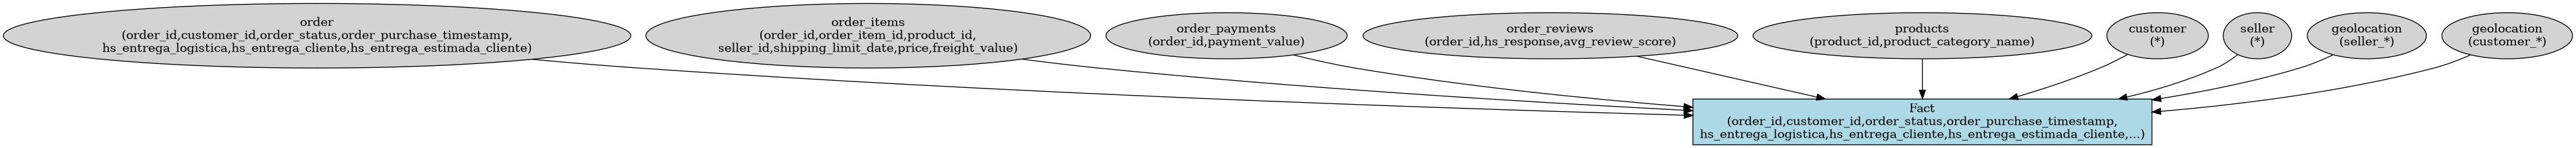

In [85]:
# diagrama
from graphviz import Digraph
from IPython.display import Image

dot = Digraph()

# Fact Table (Central Node)
dot.node('Fact', 'Fact\n(order_id,customer_id,order_status,order_purchase_timestamp,\nhs_entrega_logistica,hs_entrega_cliente,hs_entrega_estimada_cliente,...)', 
         shape='box', style='filled', fillcolor='lightblue')

# Dimension Tables (Surrounding Nodes)
dimensions = {
    'orders': 'order\n(order_id,customer_id,order_status,order_purchase_timestamp,\nhs_entrega_logistica,hs_entrega_cliente,hs_entrega_estimada_cliente)',
    'order_items': 'order_items\n(order_id,order_item_id,product_id,\nseller_id,shipping_limit_date,price,freight_value)',
    'order_payments': 'order_payments\n(order_id,payment_value)',
    'order_reviews': 'order_reviews\n(order_id,hs_response,avg_review_score)',
    'products': 'products\n(product_id,product_category_name)',
    'customer': 'customer\n(*)',
    'seller': 'seller\n(*)',
    'geolocation_s': 'geolocation\n(seller_*)',
    'geolocation_c': 'geolocation\n(customer_*)'
}

for dim, label in dimensions.items():
    dot.node(dim, label, shape='ellipse', style='filled', fillcolor='lightgray')
    dot.edge(dim, 'Fact')  # Connect dimensions to fact table

# Render and show the diagram
dot.render('star_schema', format='png', cleanup=False)

Image('star_schema.png') 

# Respuestas

In [86]:
import matplotlib.pylab as plt

### 1

In [87]:
# vamos por la 1: en que estados residen los clientes y el valor monetario de cada estado
# podemos contar simplemente
r11df = df[['customer_state', 'customer_unique_id']].groupby('customer_state').count()\
.rename(columns={'customer_unique_id': 'cantidad'}).sort_values(by='cantidad', ascending=False)

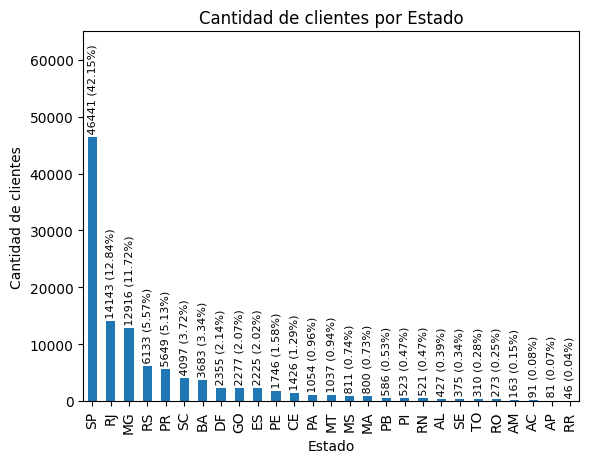

In [88]:
ax = r11df.plot.bar(legend=False, title="Cantidad de clientes por Estado",
                   xlabel="Estado", ylabel="Cantidad de clientes")
total = r11df.cantidad.sum()

for container in ax.containers:
    #labels = [" "+str(v) for v in container.datavalues]
    labels = [f" {v} ({v/total:.2%})" for v in container.datavalues]
    #print(container.datavalues)
    ax.bar_label(container, labels=labels, label_type='edge', rotation=90, fontsize='8')

ax.set_ylim([0,r11df.cantidad.max()*1.4])
plt.show()

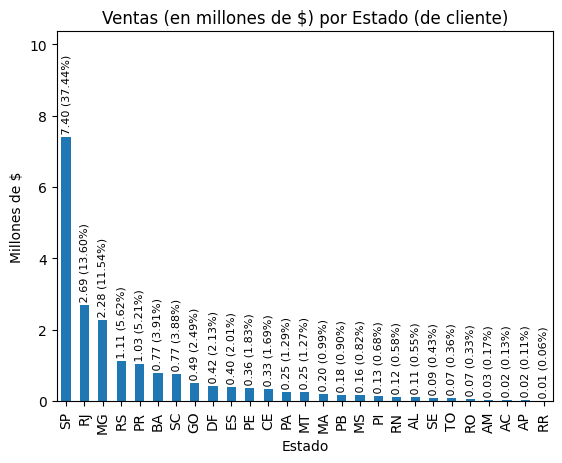

In [89]:
r12df = df.groupby('customer_state')[['payment_value']].sum('payment_value').sort_values(
    by='payment_value', ascending=False)/1000000

ax = r12df.plot.bar(legend=False,title="Ventas (en millones de $) por Estado (de cliente)",
                   xlabel="Estado", ylabel="Millones de $")
#total = axdf.sum().sum()
total = r12df.sum().sum()


for container in ax.containers:
    labels = [f" {v:.2f} ({v/total:.2%})" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', rotation=90, fontsize='8')

ax.set_ylim([0,r12df.payment_value.max()*1.4])

plt.show()

### 2

In [90]:
# 2. en que estados estan los vendedores y cuales son los principales comercios
# podria primero contar vendedores diferentes agrupando por estado
# luego comparar con la cantidad de ventas
# esto podria hacerlo por cantidad de venta o por valor de venta.. vamos por valor de venta

In [91]:
r21df = df[['seller_state', 'seller_id']].groupby('seller_state').count()\
.rename(columns={'seller_id': 'cantidad'}).sort_values(by='cantidad', ascending=False)

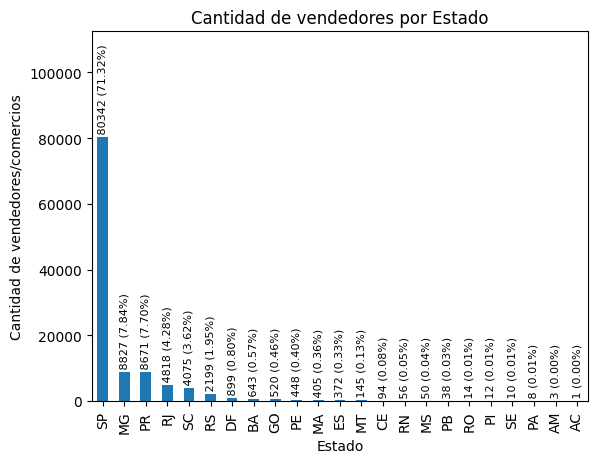

In [92]:
ax = r21df.plot.bar(legend=False, title="Cantidad de vendedores por Estado",
                   xlabel="Estado", ylabel="Cantidad de vendedores/comercios")
total = r21df.cantidad.sum()

for container in ax.containers:
    #labels = [" "+str(v) for v in container.datavalues]
    labels = [f" {v} ({v/total:.2%})" for v in container.datavalues]
    #print(container.datavalues)
    ax.bar_label(container, labels=labels, label_type='edge', rotation=90, fontsize='8')

ax.set_ylim([0,r21df.cantidad.max()*1.4])
plt.show()

In [93]:
# principales comercios (10 principales)
r22df = df.groupby('seller_id')[['payment_value']].sum('payment_value').sort_values(by='payment_value', ascending=False).head(10)

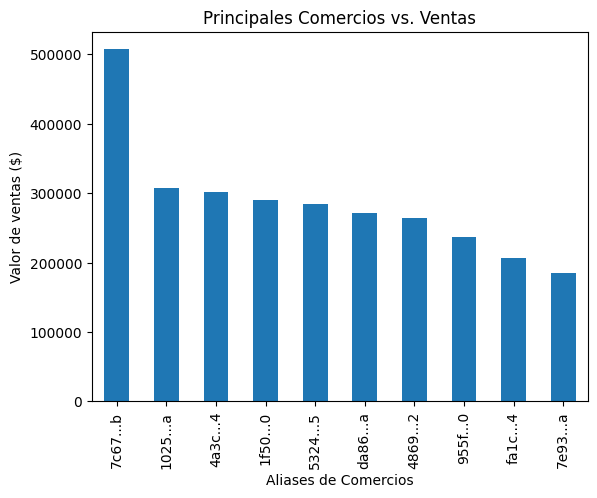

In [94]:
principalescomerciosdf = r22df[:30]
principalescomerciosdf.index = principalescomerciosdf.index.str[:4]+"..."+principalescomerciosdf.index.str[-1]

ax = principalescomerciosdf.plot.bar(legend=None, xlabel="Aliases de Comercios", ylabel="Valor de ventas ($)", title="Principales Comercios vs. Ventas")

### 3

In [95]:
# 3. productos mas vendidos, categorias mas vendidas

# veamos primero cuales son las categorias mas vendidas, contando items vendidos
r31df = df[(df.order_status!='canceled')|(df.order_status!='unavailable')][
['product_category_name','product_id']].groupby('product_category_name').count()\
.sort_values('product_id', ascending=False)[:30]

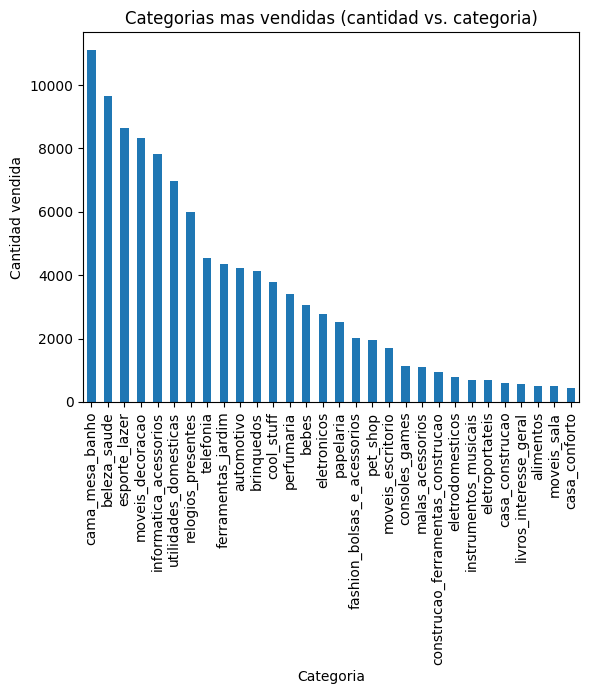

In [96]:
ax = r31df.plot.bar(legend=None, xlabel="Categoria", ylabel="Cantidad vendida", title="Categorias mas vendidas (cantidad vs. categoria)")

In [97]:
r32df = df[['product_id','product_category_name','order_id']].groupby(['product_id','product_category_name'], as_index=False)\
.count().sort_values('order_id', ascending=False).rename(columns={'order_id': 'cantidad'})

In [98]:
r32df

,product_id,product_category_name,cantidad
21724,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,527
19394,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,488
8456,422879e10f46682990de24d770e7f83d,ferramentas_jardim,484
7231,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,392
6950,368c6c730842d78016ad823897a372db,ferramentas_jardim,388
...,...,...,...
32334,fff1059cd247279f3726b7696c66e44e,esporte_lazer,1
32330,ffeb228c521d5464d1f71444da96c446,telefonia,1
32329,ffe9468f4d890db80b7231e86931ff37,brinquedos,1
32324,ffdde3d63e889c9a9f9ec30d82a4c815,brinquedos,1


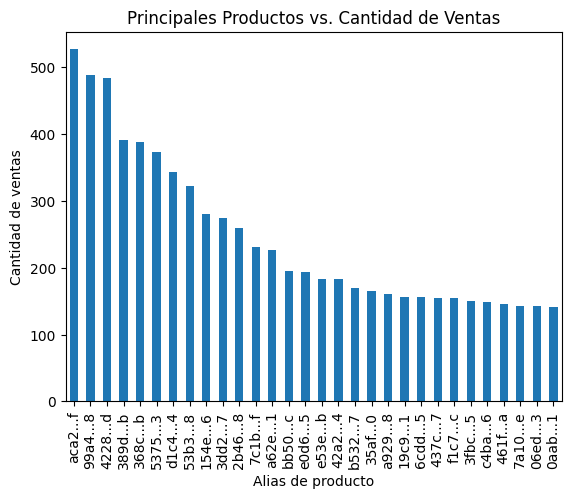

In [99]:
principalesproductosdf = r32df[:30]
principalesproductosdf.index = principalesproductosdf.product_id.str[:4] + "..." + principalesproductosdf.product_id.str[-1]

ax = principalesproductosdf.plot.bar(legend=None, xlabel="Alias de producto", ylabel="Cantidad de ventas",
                                     title="Principales Productos vs. Cantidad de Ventas")

### 4

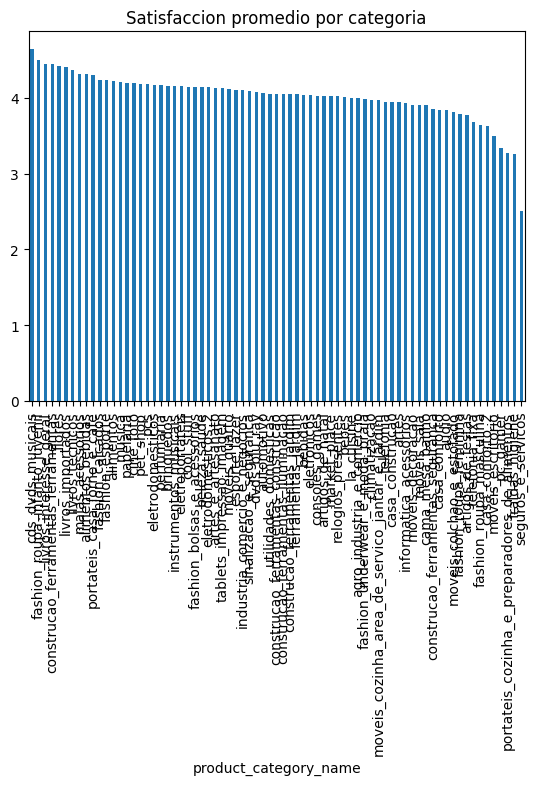

In [100]:
# 4. relacion entre satisfaccion y categoria... podemos graficar simplemente y ver
ax = df[['product_category_name', 'avg_review_score']].groupby('product_category_name')\
.mean().sort_values('avg_review_score', ascending=False).plot.bar(legend=None, title="Satisfaccion promedio por categoria")

In [101]:
# a excepcion de la categoria 'cds_dvds_musicais' y 'segurop_e_servicios' (outliers), no parece haber mucha diferencia
# podemos tomar la hipotesis nula: no hay relacion entre categoria y puntuacion (promedio) y poner a prueba esto

In [102]:
import scipy.stats as stats

testdf = df[['product_category_name', 'avg_review_score']
].groupby('product_category_name').std().sort_values('avg_review_score', ascending=False)#.plot.bar()#.plot.scatter(x='product_category_name', y='review_score')

tr = stats.kruskal(*[v[0] for v in testdf.values])

In [103]:
print(tr.pvalue)

0.477833332653075


In [104]:
# p value ~=0.5 > 0.05, no hay evidencia para rechazar la hipotesis nula => no hay relacion entre categoria y satisfaccion

### 5

In [105]:
# 5. relaciones interesantes entre datos? que tengo para relacionar?: satisfaccion, valor de compra.. todo lo que sea numerico

In [106]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'hs_entrega_logistica',
       'hs_entrega_cliente', 'hs_entrega_estimada_cliente',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'customer_geolocation_zip_code_prefix',
       'customer_avg_lat', 'customer_avg_lng', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_geolocation_zip_code_prefix',
       'seller_avg_lat', 'seller_avg_lng', 'payment_value', 'hs_response',
       'avg_review_score', 'product_category_name'],
      dtype='object')

In [107]:
# podria ver correlaciones entre: hs de entrega, hs_response, avg_review_score
corrdf = df[['hs_entrega_logistica', 'hs_entrega_cliente', 'hs_entrega_estimada_cliente', 'hs_response', 'price', 'freight_value', 'avg_review_score']].corr()

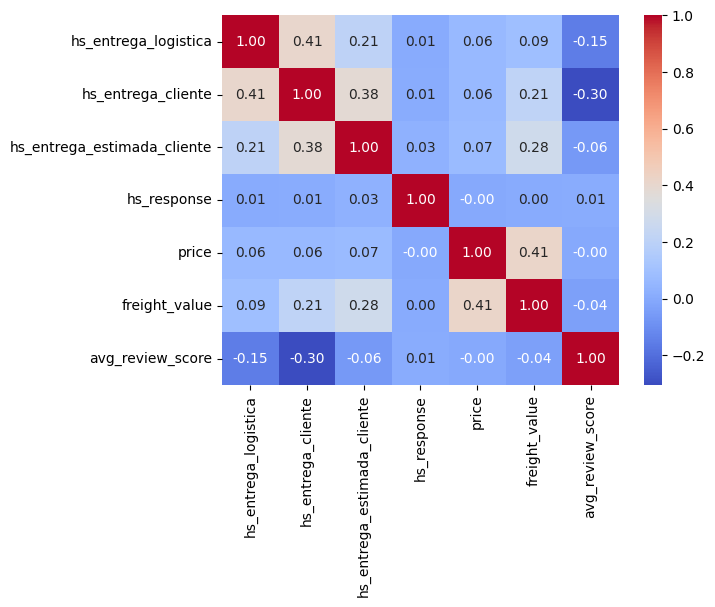

In [108]:
# podemos visualizar esto mejor
import seaborn as sns

ax = sns.heatmap(corrdf, annot=True, cmap='coolwarm', fmt=".2f")

# se ve correlacion negativa (-0.3) entre review promedio y hs_entrega_cliente (algo para ver era tambien diferencia entre estimacion y entrega real)

# es de esperarse la positiva entre tiempos de entrega logistica y a cliente,
# lo mismo para hs de entrega y freight value (mayor tiempo, mayor distancia, mayor flete

### centros logisticos

In [109]:
# Si la empresa quisiera construir 3 centros logísticos a fin de reducir al máximo posible los tiempos de entrega,
# ¿en qué lugares debe hacerlo?

In [118]:
# usamos geopandas para graficar el mapa de brasil y las coordenadas
import geopandas as gpd

world = gpd.read_file('data/map/ne_110m_admin_0_countries.shx')
brazil = world[world.NAME == "Brazil"]

In [119]:
# k-means clustering...! (con k=3)
# es la herramienta ideal porque agrupa en clusters, con los centros minimizando la distancia a los puntos que pertecen a su cluster

# lo puedo hacer considerando solo las coordenadas o tambien junto con el tiempo de entrega a clientes

In [120]:
# la primera idea fue:
# podria tomar todas las ventas (entregadas), agrupar por vendedor... puedo promediar la ubi de los clientes (de ese vendedor)
# para asociar con un vendedor una ubi promedio de cliente 
# me quedaria ahi con una tabla con 3 columnas: ubi vendedor, ubi promedio (de sus) clientes, tiempo entrega promedio

# pero voy a probar sin hacer eso. voy a conservar todos los pares (solo las ubicaciones)

In [121]:
coordinatesandtimesdf = df[df.order_status=='delivered'][['seller_id', 'seller_avg_lat', 'seller_avg_lng',
                                                          'customer_avg_lat', 'customer_avg_lng']]

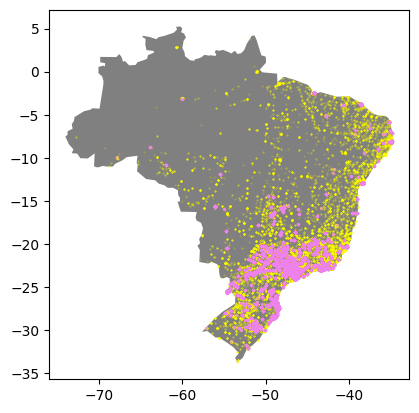

In [122]:
# asi se ven las ubicaciones de vendedores y clientes sin promediar nada
ax = brazil.plot(color='gray')
s1 = ax.scatter(df['customer_avg_lng'],df['customer_avg_lat'], color='yellow', label='customers', s=0.2, alpha=0.25)
s2 = ax.scatter(df['seller_avg_lng'],df['seller_avg_lat'], color='violet', label='sellers', s=2, alpha=0.5)

# vendedores en violeta, clientes en amarillo

In [146]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [147]:
coordinatesandtimesdf = coordinatesandtimesdf.dropna()

In [148]:
# primero considero solo las ubicaciones
data = coordinatesandtimesdf[['seller_avg_lat', 'seller_avg_lng', 'customer_avg_lat', 'customer_avg_lng']].dropna()

# reescaleamos (min-max)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [149]:
k = 3

# aplicamos k-means
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled)

# y obtenemos los centros de los clusters
cluster_centers = kmeans.cluster_centers_

In [150]:
cluster_centers

array([[0.80399892, 0.86113734, 0.41478186, 0.74596387],
       [0.31091431, 0.57850873, 0.67745626, 0.8483648 ],
       [0.3057583 , 0.56803317, 0.28914107, 0.68024828]])

In [151]:
# y los volvemos a su escala original
actual_centers = scaler.inverse_transform(cluster_centers)  # Convert back to original scale

In [152]:
actual_centers

array([[ -8.29855991, -38.88790317, -18.12196603, -44.41957641],
       [-22.88301128, -47.09485832,  -8.26324033, -40.54170121],
       [-23.03551574, -47.39904713, -22.83753049, -46.90819537]])

In [153]:
# ahora lo que tengo son 3 centros pero con 4 ubicaciones. una corresponde a la del vendedor y otra a la del cliente
# lo que quiero es que el centro este en un punto medio, asi que promedio ambas
centersdf = pd.DataFrame(actual_centers)

lat_centros = 0.5*(centersdf[0]+centersdf[2])
lng_centros = 0.5*(centersdf[1]+centersdf[3])

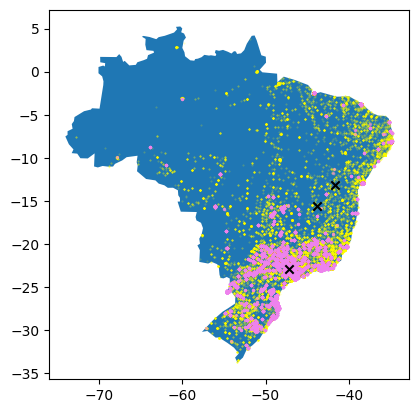

In [154]:
ax = brazil.plot()

s1 = ax.scatter(df['customer_avg_lng'],df['customer_avg_lat'], color='yellow', label='customers', s=0.2, alpha=0.25)
s2 = ax.scatter(df['seller_avg_lng'],df['seller_avg_lat'], color='violet', label='sellers', s=2, alpha=0.5)

sc = plt.scatter(lng_centros, lat_centros,c='black', marker='x')

In [155]:
# me gustaria ver como se distribuyen los cluster, que clientes/vendedores corresponden a cual centro logistico

In [156]:
ubis = scaler.inverse_transform(data_scaled[['seller_avg_lat','seller_avg_lng', 'customer_avg_lat', 'customer_avg_lng']])

In [157]:
clusters = data_scaled['cluster'].to_numpy().reshape(-1,1)

In [158]:
ubisdf = pd.DataFrame(ubis, columns=['seller_lat','seller_lng', 'customer_lat', 'customer_lng'])

In [159]:
clustersdf = pd.DataFrame(clusters,columns=['cluster'])

In [160]:
ubisyclustersdf = pd.concat([ubisdf,clustersdf],axis=1)

In [161]:
clustercolorsdict = {0: 'blue', 1: 'green', 2: 'red'}

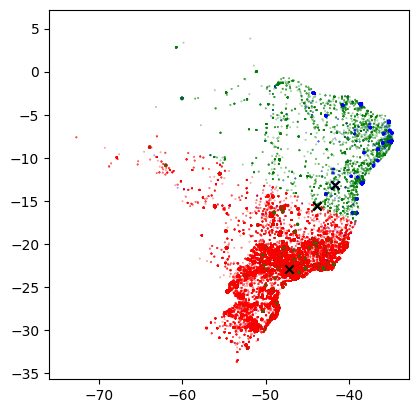

In [162]:
ax = brazil.plot(color='white')

s1 = ax.scatter(ubisyclustersdf['customer_lng'], ubisyclustersdf['customer_lat'],
                c=ubisyclustersdf['cluster'].map(clustercolorsdict), s=0.5, alpha=0.5, marker='.')
s2 = ax.scatter(ubisyclustersdf['seller_lng'], ubisyclustersdf['seller_lat'],
                c=(ubisyclustersdf['cluster'].map(clustercolorsdict)), s=2, alpha=0.6, marker='o')

sc = plt.scatter(lng_centros, lat_centros,c=clustercolorsdict.values(), marker='x')
sc2 = plt.scatter(lng_centros, lat_centros,c='black', marker='x')

# marco con colores cada cluster (puntos mas grandes son vendedores, mas chicos son clientes)

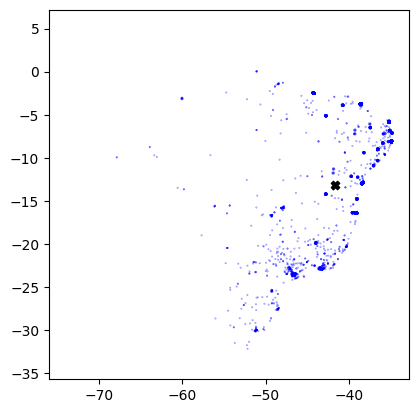

In [163]:
# quiero ver el cluster 0 (azul) de cerca...

ax = brazil.plot(color='white')

s1 = ax.scatter(ubisyclustersdf[ubisyclustersdf.cluster==0]['customer_lng'], ubisyclustersdf[ubisyclustersdf.cluster==0]['customer_lat'],
                c=ubisyclustersdf[ubisyclustersdf.cluster==0]['cluster'].map(clustercolorsdict), s=0.5, alpha=0.5, marker='.')
s2 = ax.scatter(ubisyclustersdf[ubisyclustersdf.cluster==0]['seller_lng'], ubisyclustersdf[ubisyclustersdf.cluster==0]['seller_lat'],
                c=(ubisyclustersdf[ubisyclustersdf.cluster==0]['cluster'].map(clustercolorsdict)), s=2, alpha=0.6, marker='o')

#sc = plt.scatter(lng_centros, lat_centros,c=clustercolorsdict.values(), marker='X', s=3)
sc2 = plt.scatter(lng_centros[0], lat_centros[0],c='black', marker='X')

# no esta mal

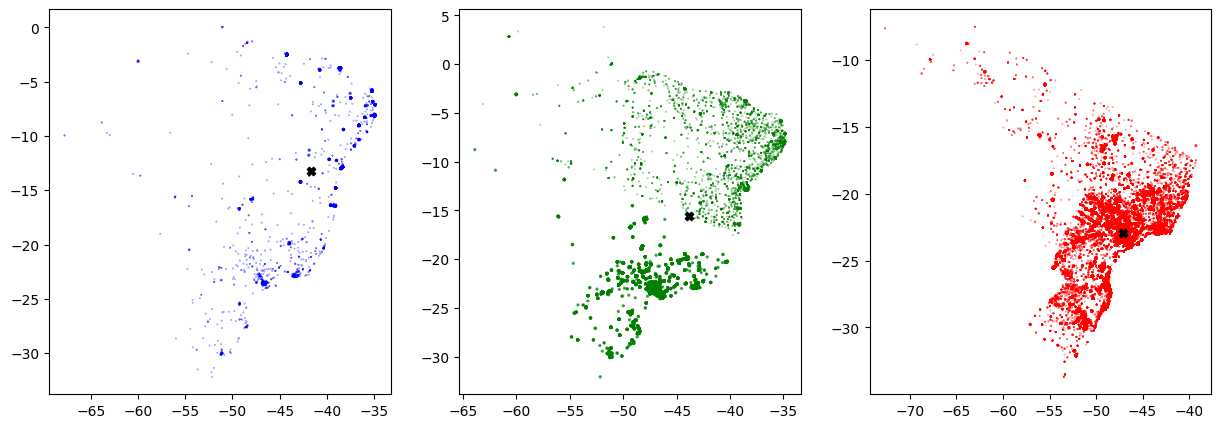

In [164]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for i in range(3):
    #ax = brazil.plot(color='white')
    
    s1 = axes[i].scatter(ubisyclustersdf[ubisyclustersdf.cluster==i]['customer_lng'], ubisyclustersdf[ubisyclustersdf.cluster==i]['customer_lat'],
                    c=ubisyclustersdf[ubisyclustersdf.cluster==i]['cluster'].map(clustercolorsdict), s=0.5, alpha=0.5, marker='.')
    s2 = axes[i].scatter(ubisyclustersdf[ubisyclustersdf.cluster==i]['seller_lng'], ubisyclustersdf[ubisyclustersdf.cluster==i]['seller_lat'],
                    c=(ubisyclustersdf[ubisyclustersdf.cluster==i]['cluster'].map(clustercolorsdict)), s=2, alpha=0.6, marker='o')
    
    sc2 = axes[i].scatter(lng_centros[i], lat_centros[i],c='black', marker='X')

# beleza

In [165]:
actual_centers

array([[ -8.29855991, -38.88790317, -18.12196603, -44.41957641],
       [-22.88301128, -47.09485832,  -8.26324033, -40.54170121],
       [-23.03551574, -47.39904713, -22.83753049, -46.90819537]])

In [166]:
# !!!

In [167]:
lat_centros

0   -13.210263
1   -15.573126
2   -22.936523
dtype: float64

In [168]:
lng_centros

0   -41.653740
1   -43.818280
2   -47.153621
dtype: float64